In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, precision_recall_curve, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Data and EDA

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
len(df)

284807

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# df.isnull().sum()

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Dropping the time column
df.drop(['Time'], axis=1, inplace=True)

<Axes: xlabel='Class', ylabel='count'>

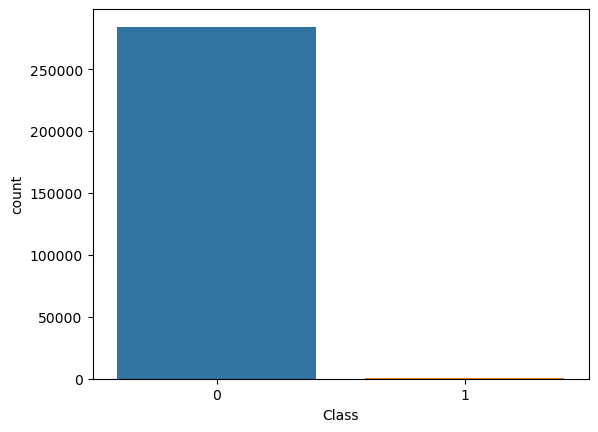

In [11]:
sns.countplot(data=df, x='Class') # highly imbalanced dataset

In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
492/len(df)*100 # percent of fradulent transactions

0.1727485630620034

<Axes: >

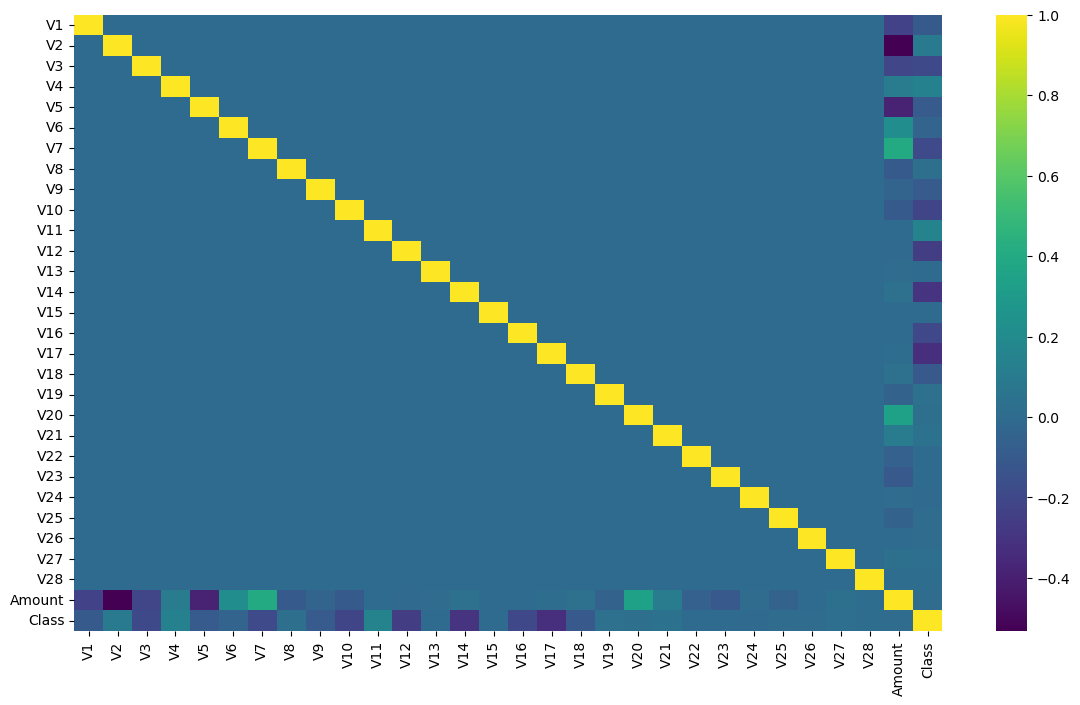

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap='viridis')

In [15]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Some Observations

1. For class 1, all the other V_n features have a genericaly higher (absolute) values
2. For class 1, Amount has a genericaly higher value too

In [16]:
# sns.boxplot(data=df, x='Class', y='Time')

<Axes: xlabel='Class', ylabel='V15'>

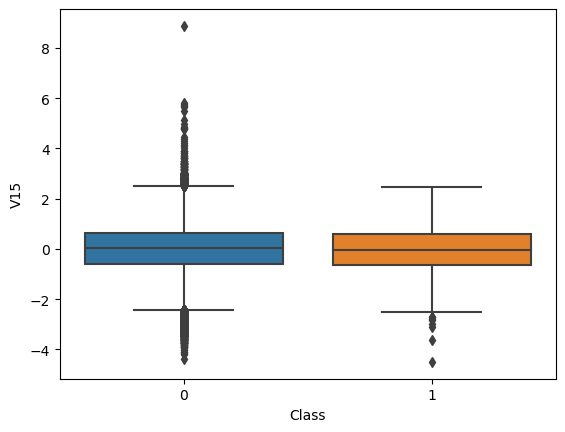

In [17]:
sns.boxplot(data=df, x='Class', y='V15')

In [18]:
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

<Axes: >

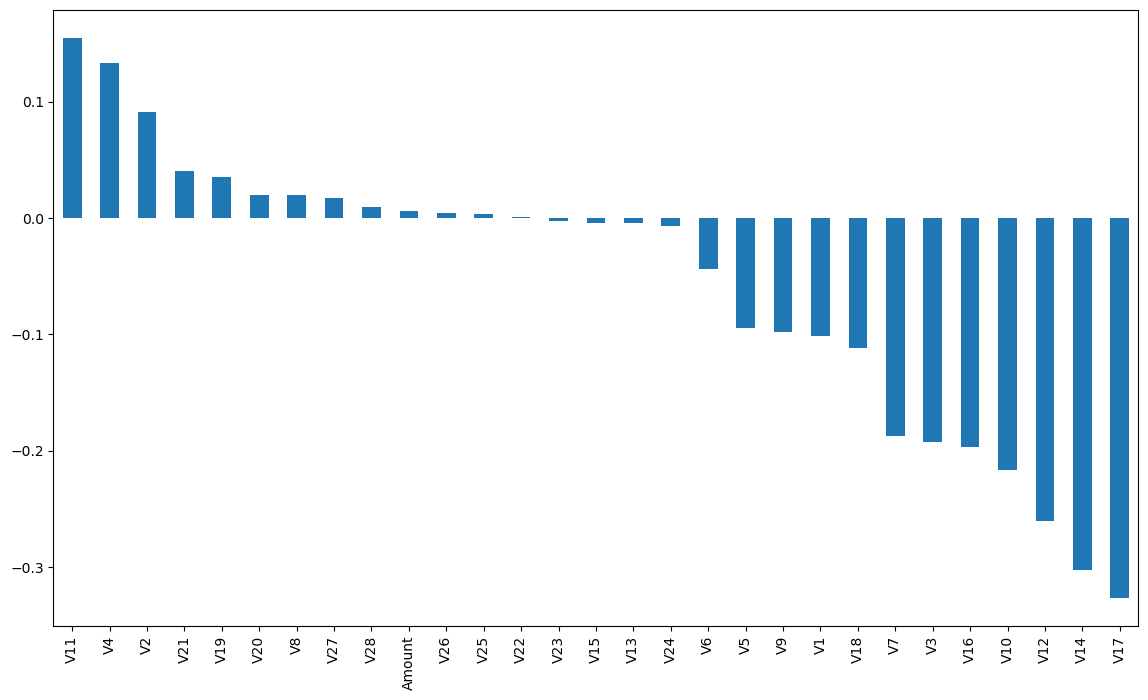

In [19]:
plt.figure(figsize=(14,8))
df.corr()['Class'].sort_values(ascending=False)[1:].plot(kind='bar')

#### Some of the most correlated features seem to be V17, V14, V12

<Axes: xlabel='V17', ylabel='V14'>

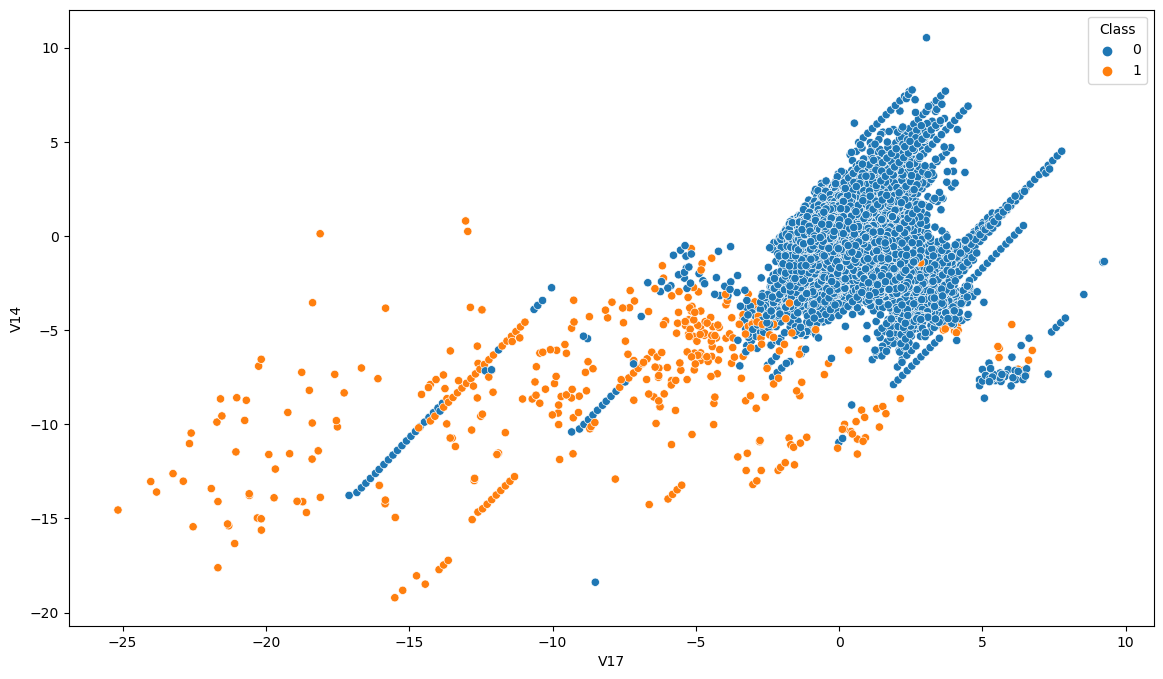

In [20]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x='V17', y='V14', hue='Class')

# Data Preprocessing

### Train-Validation-Test split

In [21]:
# Train Test Split
# df broken into df_train_val (80%) and df_test (20%)
# df_train_val further broken into df_train (80%) and df_val (20%)

In [22]:
df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Class'])

In [23]:
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=42, stratify=df_train_val['Class'])

In [24]:
# percentage of fraudulent transactions in df_train, df_val, df_test

print('% of fraud cases in Train = ', df_train['Class'].sum()/len(df_train)*100)
print('% of fraud cases in Val = ', df_val['Class'].sum()/len(df_val)*100)
print('% of fraud cases in Test = ',df_test['Class'].sum()/len(df_test)*100)

% of fraud cases in Train =  0.17281485220215498
% of fraud cases in Val =  0.1733634707805745
% of fraud cases in Test =  0.17204452090867595


In [25]:
X_train = df_train.drop('Class', axis=1).values
y_train = df_train['Class'].values

X_val = df_val.drop('Class', axis=1).values
y_val = df_val['Class'].values

X_test = df_test.drop('Class', axis=1).values
y_test = df_test['Class'].values

In [26]:
# Scaling the data

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Building Models

Due to highly imbalanced data, the recommended evaluation metric is the area under the Precision-Recall Curve.

## Decision Tree:

We will start with a decision tree to benchmark what we can get with a simple model can achieve.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dec_tree = DecisionTreeClassifier()

In [31]:
# Training the model
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
# Tree details
print('Tree Depth = ',dec_tree.get_depth())
print('No. of Leaves = ', dec_tree.get_n_leaves())

Tree Depth =  23
No. of Leaves =  127


In [33]:
# Predictions
y_pred_val_dc = dec_tree.predict(X_val)

In [34]:
# Evaluation


In [35]:
print(classification_report(y_val, y_pred_val_dc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.76      0.73      0.75        79

    accuracy                           1.00     45569
   macro avg       0.88      0.87      0.87     45569
weighted avg       1.00      1.00      1.00     45569



The model achieves a f1-score of 0.76 on the validation set.

In [36]:
confusion_matrix(y_val, y_pred_val_dc)

array([[45472,    18],
       [   21,    58]])

In [37]:
# Visualizing the tree
from sklearn.tree import plot_tree

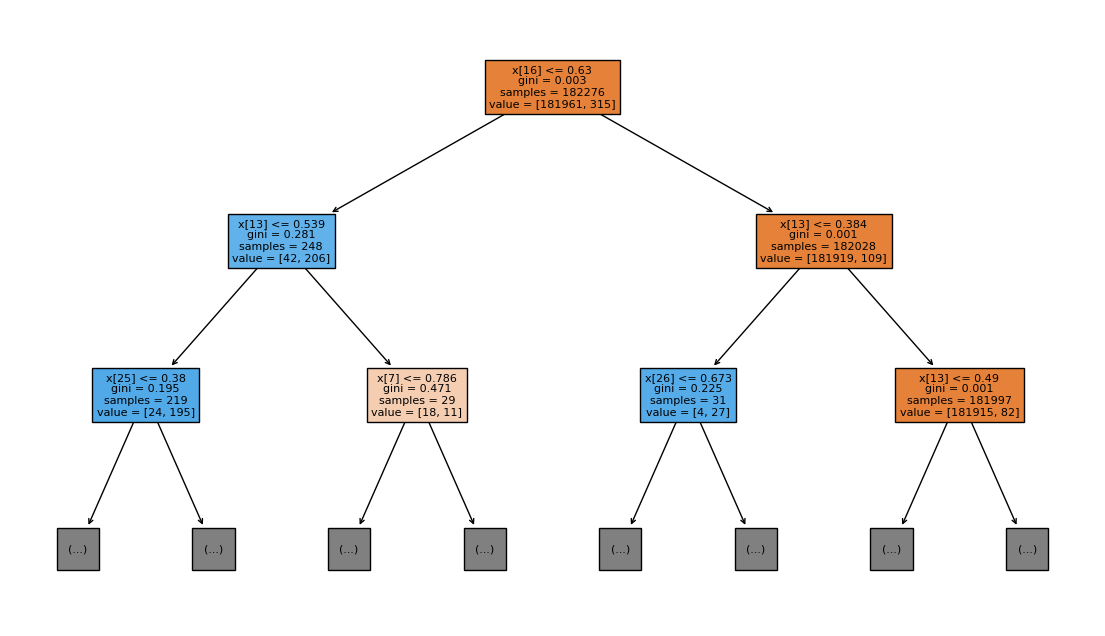

In [38]:
plt.figure(figsize=(14,8))
plot_tree(dec_tree, filled=True, max_depth=2);

## Random Forest:

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_model = RandomForestClassifier()

In [41]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
# Predictions
y_pred_val_rf = rf_model.predict(X_val)

In [43]:
# Evaluation
print(classification_report(y_val, y_pred_val_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.91      0.73      0.81        79

    accuracy                           1.00     45569
   macro avg       0.95      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569



Improved performance with Random Forest for precision

In [44]:
confusion_matrix(y_val, y_pred_val_rf)

array([[45484,     6],
       [   21,    58]])

In [45]:
# probability of each class for X_val
y_pred_val_prob_rf = rf_model.predict_proba(X_val)[:,1]

In [46]:
y_pred_val_prob_rf

array([0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ])

In [47]:
rf_precision, rf_recall, rf_threshold = precision_recall_curve(y_val, y_pred_val_prob_rf)

Text(0.5, 1.0, 'Precision Recall Curve')

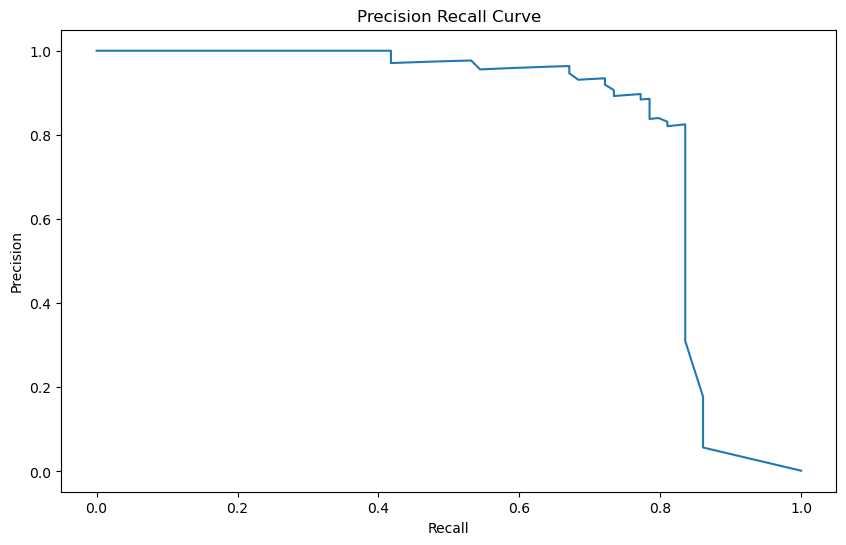

In [48]:
plt.figure(figsize=(10,6))
plt.plot(rf_recall, rf_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [49]:
feature_list = df_train.drop('Class', axis=1).columns
rf_feature_imp = rf_model.feature_importances_

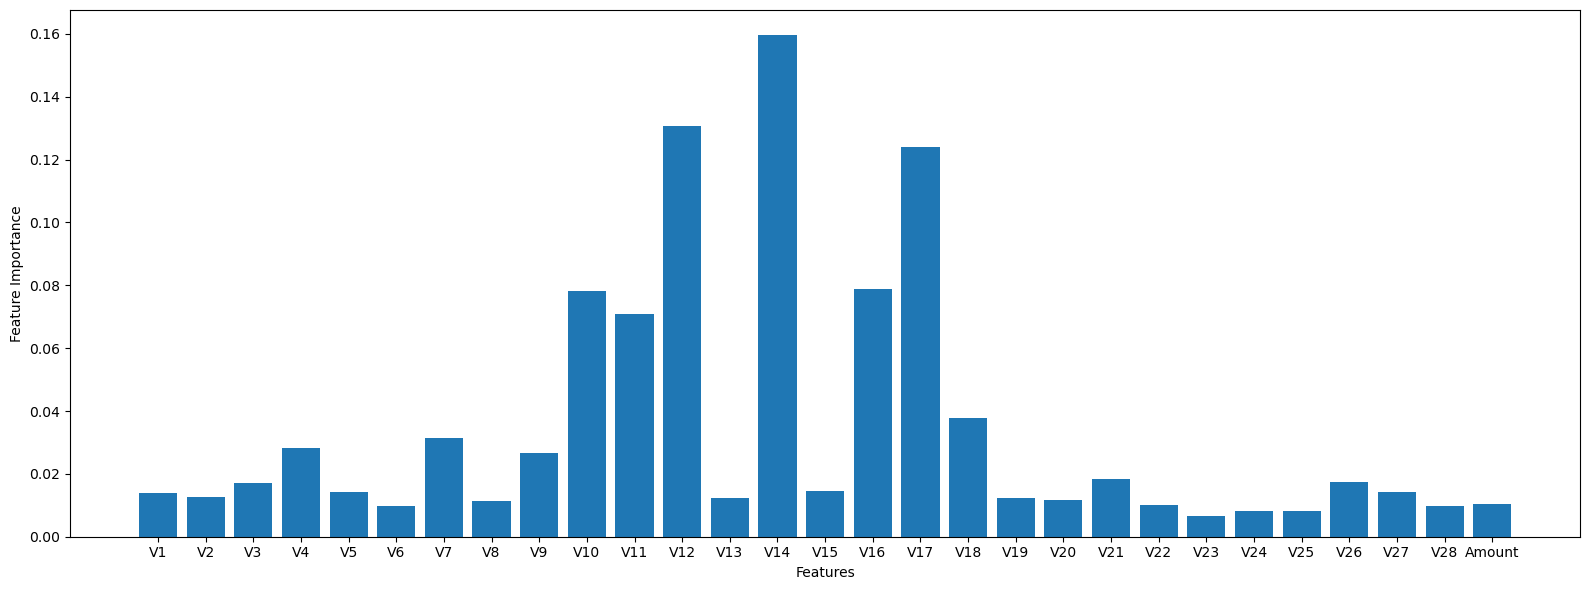

In [50]:
plt.figure(figsize=(16,6))
plt.bar(feature_list, rf_feature_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.tight_layout()

In [51]:
# area under the Precision Recall Curve
rf_auc = auc(rf_recall, rf_precision)
print('Area under the Precision Recall Curve - Random Forest = ', rf_auc)

Area under the Precision Recall Curve - Random Forest =  0.8187159461114224


## XGBoost:

In [52]:
import xgboost

In [53]:
xgb_model = xgboost.XGBClassifier(objective='binary:logistic', # for binary classification
                      verbosity=2,               # for printing messages
                      eta=0.6,                   # learning rate
                      scale_pos_weight=578,      # (no. of 0) / (no. of 1) = 181961/315 = 578 for imbalanced dataset
                      eval_metric='aucpr',       # area under the precision recall curve
                      )

In [54]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.6, eval_metric='aucpr',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [55]:
# Training the model
xgb_model.fit(X_train, 
              y_train,
              verbose=True,
              eval_set=[(X_val, y_val)],
              early_stopping_rounds=20      # stop if aucpr doesn't improve for 20 rounds
              )

[0]	validation_0-aucpr:0.45365


/Users/virajmeruliya/anaconda3/envs/tensorflow/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-aucpr:0.49178
[2]	validation_0-aucpr:0.63189
[3]	validation_0-aucpr:0.63138
[4]	validation_0-aucpr:0.67539
[5]	validation_0-aucpr:0.68279
[6]	validation_0-aucpr:0.68676
[7]	validation_0-aucpr:0.69768
[8]	validation_0-aucpr:0.75954
[9]	validation_0-aucpr:0.78757
[10]	validation_0-aucpr:0.79047
[11]	validation_0-aucpr:0.78964
[12]	validation_0-aucpr:0.80129
[13]	validation_0-aucpr:0.80226
[14]	validation_0-aucpr:0.80239
[15]	validation_0-aucpr:0.81052
[16]	validation_0-aucpr:0.81702
[17]	validation_0-aucpr:0.81845
[18]	validation_0-aucpr:0.81657
[19]	validation_0-aucpr:0.82043
[20]	validation_0-aucpr:0.82035
[21]	validation_0-aucpr:0.82348
[22]	validation_0-aucpr:0.82504
[23]	validation_0-aucpr:0.82460
[24]	validation_0-aucpr:0.82538
[25]	validation_0-aucpr:0.83005
[26]	validation_0-aucpr:0.83265
[27]	validation_0-aucpr:0.83409
[28]	validation_0-aucpr:0.83374
[29]	validation_0-aucpr:0.83516
[30]	validation_0-aucpr:0.83533
[31]	validation_0-aucpr:0.83497
[32]	validation_0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.6, eval_metric='aucpr',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [56]:
# Predictions
y_pred_val_xgb = xgb_model.predict(X_val)

In [57]:
# Evaluation
print(classification_report(y_val, y_pred_val_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.88      0.80      0.83        79

    accuracy                           1.00     45569
   macro avg       0.94      0.90      0.92     45569
weighted avg       1.00      1.00      1.00     45569



In [58]:
confusion_matrix(y_val, y_pred_val_xgb)

array([[45481,     9],
       [   16,    63]])

In [59]:
# probability of each class for X_val
y_pred_val_prob_xgb = xgb_model.predict_proba(X_val)[:,1]

In [60]:
y_pred_val_prob_xgb

array([9.4556839e-08, 1.2635420e-08, 3.7969414e-08, ..., 6.1722401e-09,
       6.8483947e-09, 3.6303584e-07], dtype=float32)

In [61]:
# Precision recall curve
xgb_precision, xgb_recall, xgb_threshold = precision_recall_curve(y_val, y_pred_val_prob_xgb)

Text(0.5, 1.0, 'Precision Recall Curve - XGBoost')

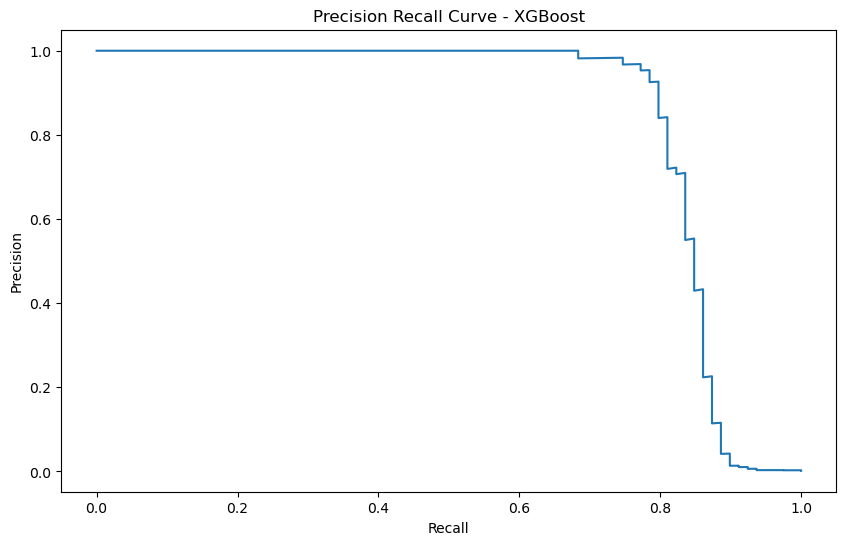

In [62]:
plt.figure(figsize=(10,6))
plt.plot(xgb_recall, xgb_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - XGBoost')

In [63]:
# Area under the Precision Recall Curve
xgb_auc = auc(xgb_recall, xgb_precision)
print('Area under the Precision Recall Curve - XGBoost = ', xgb_auc)

Area under the Precision Recall Curve - XGBoost =  0.8406123958609455


In [64]:
xgb_feature_imp = xgb_model.feature_importances_

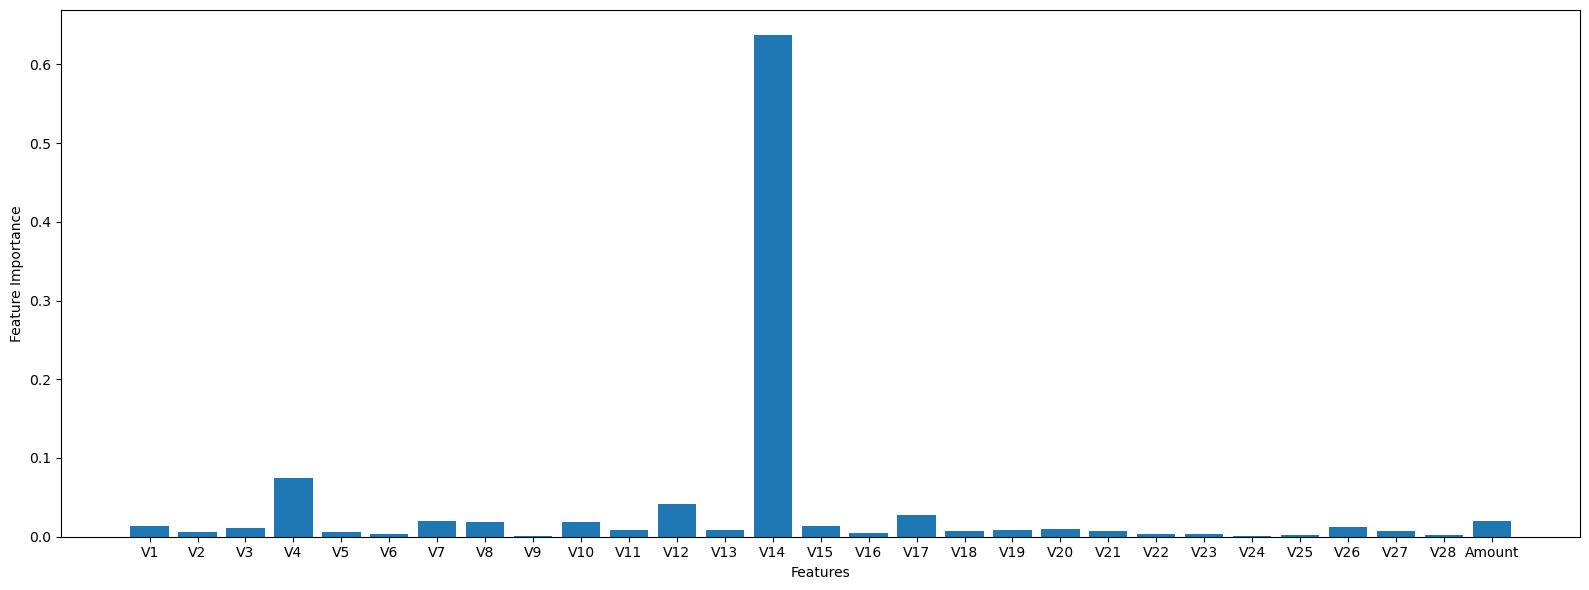

In [65]:
plt.figure(figsize=(16,6))
plt.bar(feature_list, xgb_feature_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.tight_layout()

# Neural Network

In [374]:
from tensorflow.keras.metrics import AUC
pr_metric = AUC(curve='PR', num_thresholds=2000) # The higher the threshold value, the more accurate it is calculated.

In [375]:
nn_model = Sequential()

# Dataset has 29 features

#nn_model.add(Dense(30, activation='relu'))  # 1st hidden layer
#nn_model.add(Dropout(0.1))                  
nn_model.add(Dense(20, activation='relu'))  # 2nd hidden layer
#nn_model.add(Dropout(0.1))
nn_model.add(Dense(10, activation='relu'))  # 3nd hidden layer
#nn_model.add(Dropout(0.1))
nn_model.add(Dense(5, activation='relu'))  # 4nd hidden layer
#nn_model.add(Dropout(0.1))                  

nn_model.add(Dense(1, activation='sigmoid')) # output layer

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[pr_metric, 'Recall'])

In [376]:
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min', 
                           patience=10,
                          )

In [389]:
nn_model.fit(X_train,
             y_train,
             epochs=300,
             validation_data=(X_val, y_val),
             verbose=1,
             #callbacks=[early_stop],
             batch_size=2048
             )

Epoch 1/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0028 - auc_11: 0.8316 - recall: 0.7937 - val_loss: 0.0033 - val_auc_11: 0.7983 - val_recall: 0.7468
Epoch 2/300
90/90 [==============================] - 0s 1ms/step - loss: 0.0028 - auc_11: 0.8310 - recall: 0.7968 - val_loss: 0.0035 - val_auc_11: 0.7925 - val_recall: 0.7342
Epoch 3/300
90/90 [==============================] - 0s 1ms/step - loss: 0.0029 - auc_11: 0.8280 - recall: 0.7841 - val_loss: 0.0034 - val_auc_11: 0.7883 - val_recall: 0.7342
Epoch 4/300
90/90 [==============================] - 0s 1ms/step - loss: 0.0028 - auc_11: 0.8318 - recall: 0.7841 - val_loss: 0.0034 - val_auc_11: 0.7908 - val_recall: 0.7595
Epoch 5/300
90/90 [==============================] - 0s 1ms/step - loss: 0.0027 - auc_11: 0.8334 - recall: 0.7968 - val_loss: 0.0033 - val_auc_11: 0.7954 - val_recall: 0.7468
Epoch 6/300
90/90 [==============================] - 0s 1ms/step - loss: 0.0028 - auc_11: 0.8304 - recall: 0.7937 - val_loss:

In [355]:
# nn_model.summary()

In [378]:
nn_losses = pd.DataFrame(nn_model.history.history)

In [379]:
nn_losses

,loss,auc_11,recall,val_loss,val_auc_11,val_recall
0,0.118614,0.016166,0.000000,0.018824,0.415107,0.000000
1,0.014009,0.249370,0.000000,0.012270,0.517382,0.000000
2,0.011508,0.568021,0.000000,0.011446,0.618169,0.000000
3,0.010834,0.699172,0.000000,0.010908,0.651692,0.000000
4,0.010159,0.719684,0.000000,0.010225,0.663516,0.000000
...,...,...,...,...,...,...
295,0.002766,0.831341,0.796825,0.003481,0.785195,0.734177
296,0.002802,0.828979,0.790476,0.003334,0.795757,0.746835
297,0.002813,0.827608,0.787302,0.003372,0.790501,0.746835
298,0.002893,0.830409,0.780952,0.003397,0.789779,0.734177


In [380]:
nn_losses.columns

Index(['loss', 'auc_11', 'recall', 'val_loss', 'val_auc_11', 'val_recall'], dtype='object')

<Axes: >

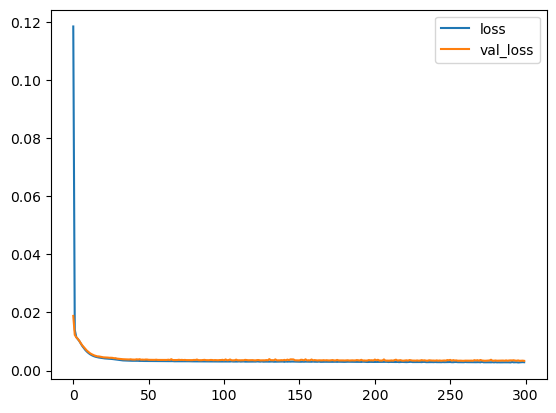

In [381]:
nn_losses[['loss', 'val_loss']].plot()

<Axes: >

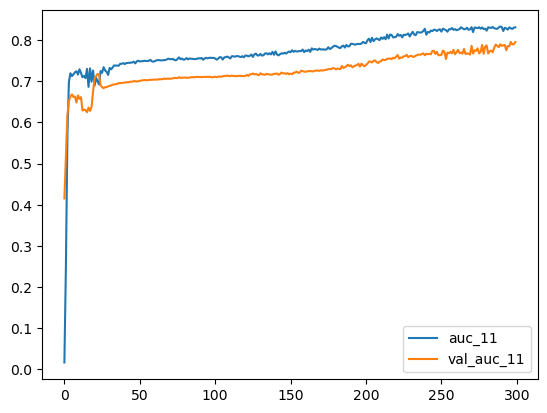

In [382]:
nn_losses[['auc_11', 'val_auc_11']].plot()

<Axes: >

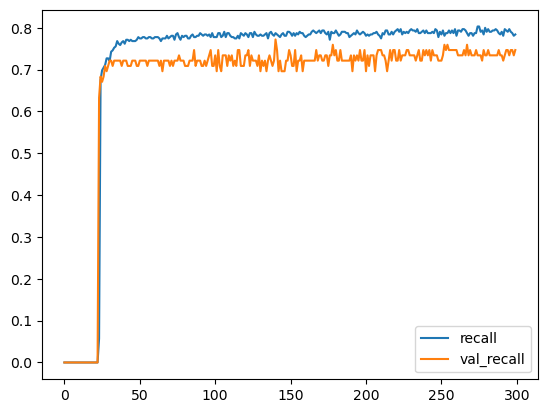

In [383]:
nn_losses[['recall', 'val_recall']].plot()

In [384]:
# Predictions
y_pred_val_prob_nn = nn_model.predict(X_val)
y_pred_val_nn = y_pred_val_prob_nn.round()

1425/1425 [==============================] - 0s 300us/step


In [385]:
# Evaluation
print(classification_report(y_val, y_pred_val_nn))
confusion_matrix(y_val, y_pred_val_nn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.87      0.75      0.80        79

    accuracy                           1.00     45569
   macro avg       0.93      0.87      0.90     45569
weighted avg       1.00      1.00      1.00     45569



array([[45481,     9],
       [   20,    59]])

In [386]:
# precision recall curve
nn_precision, nn_recall, nn_threshold = precision_recall_curve(y_val, y_pred_val_prob_nn)

Text(0.5, 1.0, 'Precision Recall Curve - Neural Network')

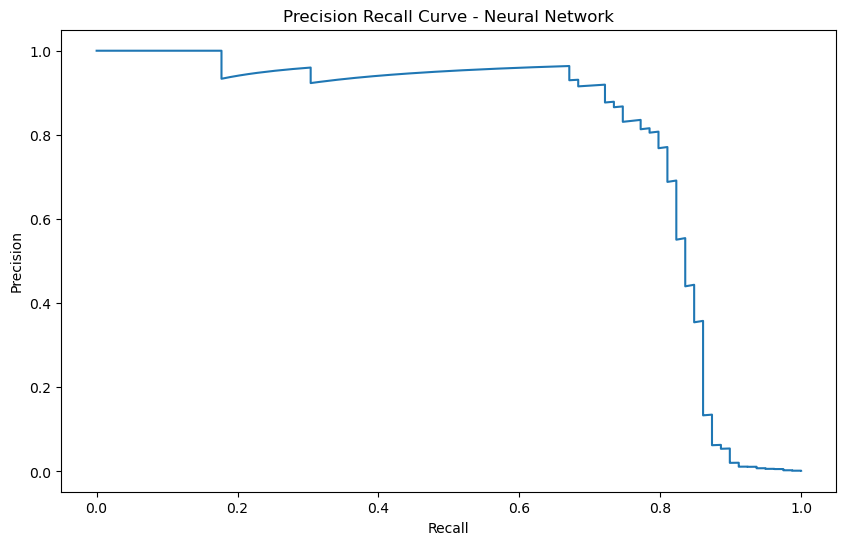

In [387]:
plt.figure(figsize=(10,6))
plt.plot(nn_recall, nn_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Neural Network')

In [388]:
# area under the precision recall curve
nn_auc = auc(nn_recall, nn_precision)
print('Area under the Precision Recall Curve - Neural Network = ', nn_auc)

Area under the Precision Recall Curve - Neural Network =  0.7953599911920811
